# Statistical Power and Sample Size Estimation
## Relationships among power, sample size and effect size
Statistical power and sample size estimation are about the relationship among three quantities:
   1. The size of the sample (N)
   2. The size of the effect in the **population**
   3. The statistical power: the probability of any given experiment obtaining a significant p-value, for a specified significance threshold (usually .05)

Lets quickly, via simulation, take a look at how these quantities are interrelated. As an example we take the problem of comparing two groups to each other via a t-test. We sample multiple times from two independent population where the difference between their means (normalised by their pooled standard deviation) in the **population** $\delta$ and the sample size are varied. To estimate the statistical power for each combination of N and $\delta$ we calculate the proportion of times the t-test returns a significant (<.05) p value.


In [2]:
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
rng = np.random.default_rng(10)
def sample_from_independent_pops(delta,n,pooled_var=1):
    """
    Draw two samples of sizes n from two populations, where the difference between the population means is consistent with the specified population effect size 'delta'. 'pooled_var' specifies the pooled variance
    """
    # set up population mean and variance consistent with the pop effect size
    mu2 = 0.
    mu1 = delta*np.sqrt(pooled_var)

    sd1 = np.sqrt(pooled_var)
    sd2 = np.sqrt(pooled_var)

    # draw samples
    sample1 = rng.normal(loc=mu1,scale=sd1,size=n)
    sample2 = rng.normal(loc=mu2,scale=sd2,size=n)
    return sample1, sample2

delts=np.linspace(0,3,20) # values of the population effect size
ns = np.array([i for i in range(3,60,5)]) # sample sizes to test
n_reps = 1000 # number of repetitions per cell
p_thresh = .05 # p values below this threshold are considered statistically significant

counts = np.zeros([len(delts),len(ns)]) # initialise cells
for i, for_d in enumerate(delts):
    for j, for_n in enumerate(ns):
        for k in range(n_reps):
            # draw samples
            s1, s2 = sample_from_independent_pops(for_d,for_n)
            # run t test
            r = ttest_ind(s1,s2)
            p = r.pvalue
            # count if p-value is significant
            if p<p_thresh:
                counts[i,j] += 1

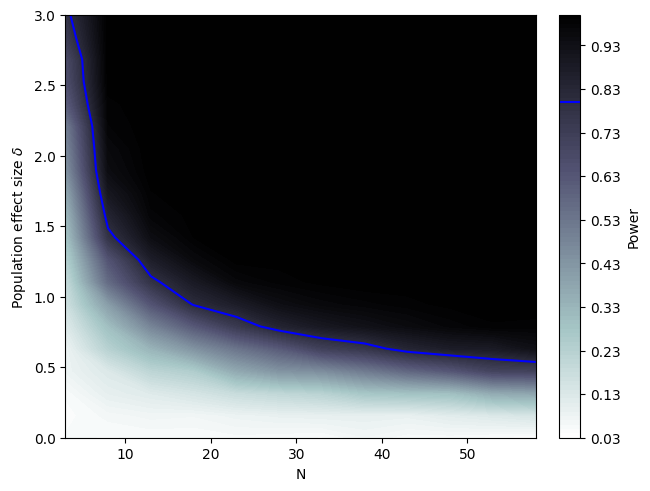

In [3]:
# convert counts to proportions
pr = counts/n_reps
# plot power as a contour plot
xx,yy = np.meshgrid(ns,delts)
fig1, ax2 = plt.subplots(layout='constrained')
cs = ax2.contourf(xx, yy, pr, 100, cmap='bone_r')
cs2 = ax2.contour(cs, levels=[.8], colors=['b'])
plt.xlabel('N')
plt.ylabel('Population effect size $\delta$')
# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(cs)
cbar.ax.set_ylabel('Power')
# Add the contour line levels to the colorbar
cbar.add_lines(cs2)



In general, any particular experiment is more likely to find the effect (obtain a significant p value) if:
1. Sample size is large
2. Effect size in the population is large

## Sample size estimation
Sample size estimation is an important part of a study design. Specifically one needs to decide how much data to collect. One wants to collect enough to have a good chance of detecting an effect if it is there (sufficient power). On the other hand data collection os often expensive and time consuming for the researchers and the participants.

To estimate the required sample size one needs to decide firstly on the kind of test (e.g. t-test) but also on what level of statistical power is acceptable (usually .8 is considered sufficient). One also has to decide what effect size in the population is expected, or establish a threshold below which the effect is uninteresting. This is not always easy and will depend enormously on the field of study.

For the sake of illustration lets say we aren't interested in effect sizes below .6. Furthermore we want to have at least an 80% chance of finding the effect if it is there. So to estimate the minimum required sample size, we find the value of N, for which the power at effect size .6 equals .8.

Minimum sample size required to detect an effect (delta>=0.6) with probability >= 0.8 with p-value threshold = 0.05: 
 N=43


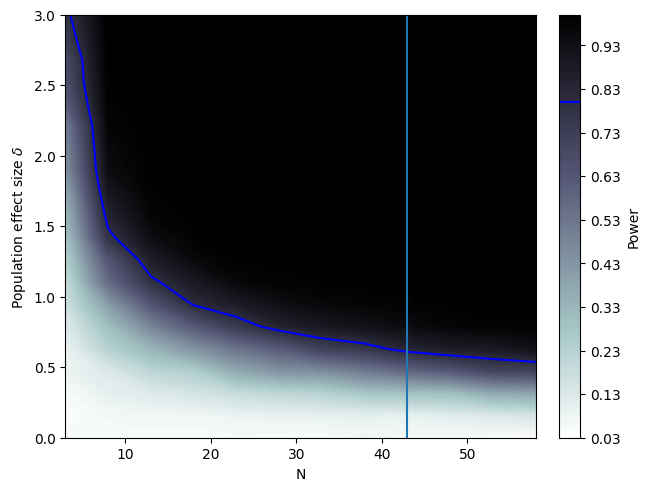

In [4]:
delta = .6 # the minimum interesting effect size
power = .8 # the desired power

##### find the sample size at power for effect size .6 exceeds .8

# find the index of d = .5 (or its closest value)
d_i = np.argmin(np.abs(delts-delta))
n_i= np.nonzero(pr[d_i,:]>power)[0][0]
N = ns[n_i]


# plot
fig1, ax2 = plt.subplots(layout='constrained')
cs = ax2.contourf(xx, yy, pr, 100, cmap='bone_r')
cs2 = ax2.contour(cs, levels=[.8], colors=['b'])
ax2.axvline(x=N)
plt.xlabel('N')
plt.ylabel('Population effect size $\delta$')
# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(cs)
cbar.ax.set_ylabel('Power')
# Add the contour line levels to the colorbar
cbar.add_lines(cs2)

print("Minimum sample size required to detect an effect (delta>={d}) with probability >= {pow} with p-value threshold = {pthresh}: \n N={N}".format(N=N,d=delta,pow=power,pthresh=p_thresh))